# Heart disease classfication

*This notebook is a exercise from "[Complete Machine Learning and Data Science: Zero to Mastery](https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/)" class on [Udemy](https://www.udemy.com/).*

I will make experiments with heart disease data and using various [scikit-learn algorithms](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

## Data
I get a available heart disease data on [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci)

## Features
The features below I get from the original data - [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease) and from the class.

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

![Hình chống trôi](https://media.giphy.com/media/1S9kD6xm4601O/giphy.gif)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Magic dunction (I have no idea :'))
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Set matplotlib style
plt.style.use('fivethirtyeight')

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
heart_disease_data = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
heart_disease_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory data analysis - EDA
The goal is try to find out more insight about the data

In [3]:
heart_disease_data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1


In [4]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_disease_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_disease_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

*The data has no empty cell, so that we don't need to fill value*

In [8]:
#Find out how many of each class we have
heart_disease_data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

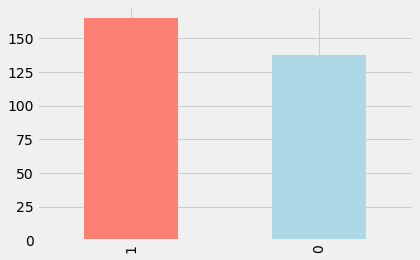

In [9]:
heart_disease_data.target.value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

### Find out some relationship between the features and `target`

**Heart Disease Frequency according to Sex**

In [10]:
heart_disease_data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(heart_disease_data.sex, heart_disease_data.target)

target,0,1
sex,,
0,24,72
1,114,93


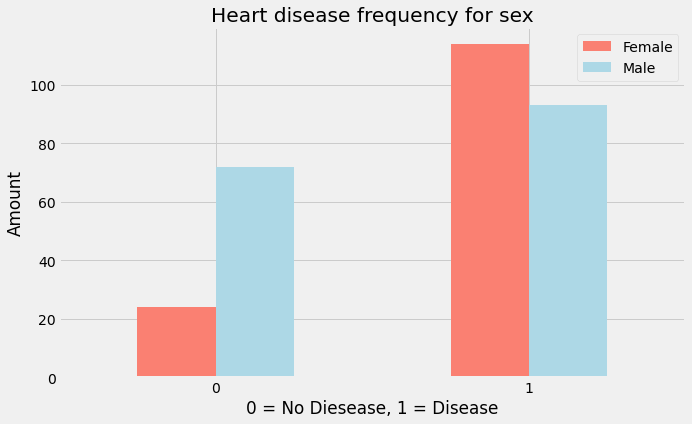

In [12]:
# Plot a chart
pd.crosstab(heart_disease_data.sex, heart_disease_data.target).plot(kind='bar',
                                                                   figsize=(10, 6),
                                                                   color=['salmon', 'lightblue'])

plt.title('Heart disease frequency for sex')
plt.xlabel('0 = No Diesease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

**Age vs. Max Heart Rate for Heart Disease**

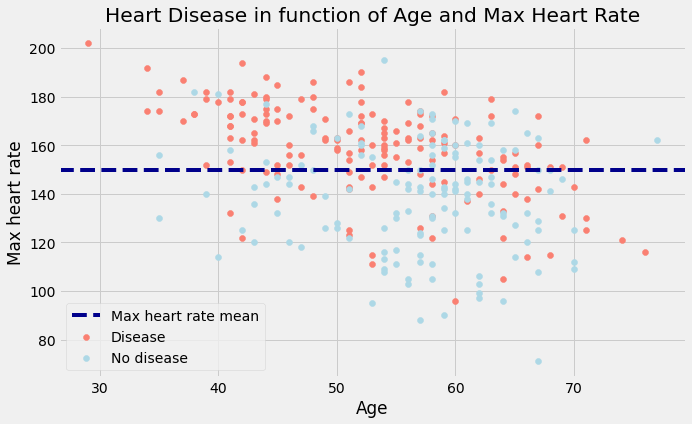

In [13]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Plot positive class
plt.scatter(heart_disease_data.age[heart_disease_data.target == 1],
           heart_disease_data.thalach[heart_disease_data.target == 1],
           c='salmon')

# Plot negative class
plt.scatter(heart_disease_data.age[heart_disease_data.target == 0],
           heart_disease_data.thalach[heart_disease_data.target == 0],
           c='lightblue')

plt.axhline(heart_disease_data.thalach.mean(), ls='--', c='darkblue')

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Max heart rate mean', 'Disease', 'No disease']);

⚡ **Heart Disease Frequency per Chest Pain Type** ⚡

cp - Chest pain type:

* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease


In [14]:
pd.crosstab(heart_disease_data.cp, heart_disease_data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


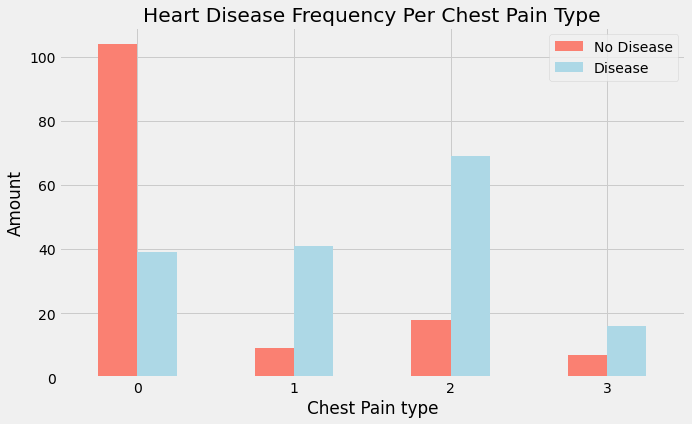

In [15]:
# Plot some chart...
pd.crosstab(heart_disease_data.cp, heart_disease_data.target).plot(kind='bar',
                                                                  figsize=(10, 6),
                                                                  color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

### ⛏️ Explore data correlation ⛏️

In [16]:
# Make a correlation matrix
heart_disease_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


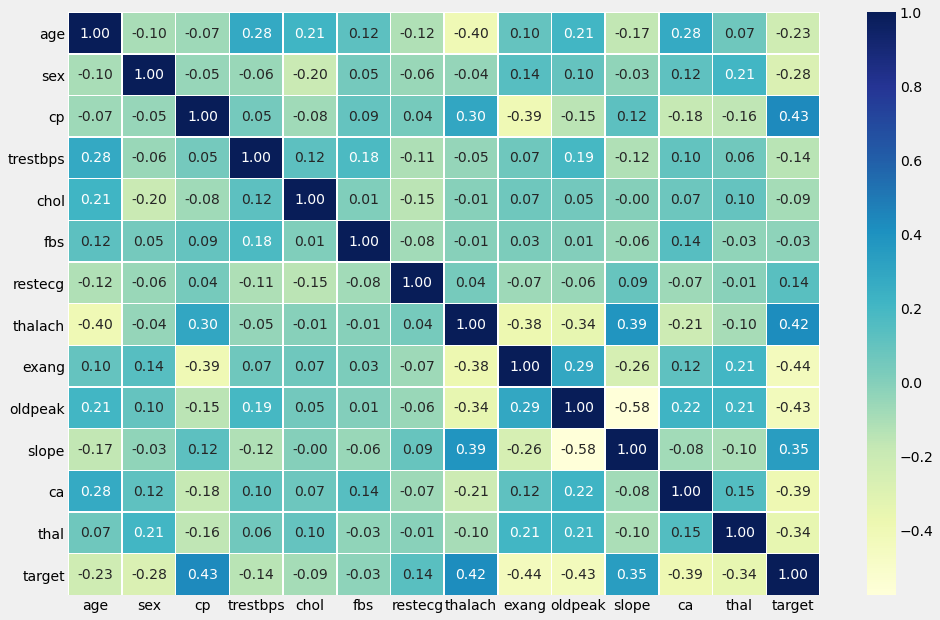

In [17]:
# # Plot a heatmap for correlation matrix
# corr_matrix = heart_disease_data.corr()

# fig, ax = plt.subplots(figsize=(15, 10))

# ax = sns.heatmap(corr_matrix,
#                 annot=True,
#                 linewidths=0.5,
#                 fmt='.2f',
#                 cmap='YlGnBu');

## Modelling

⚗️ let's start experiments...


In [18]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [19]:
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Split data
X = heart_disease_data.drop('target', axis=1)
y = heart_disease_data.target

In [21]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [25]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

In [26]:
type(y_test), type(X_train)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

⚡ Now I'm going to try 3 ML model:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [27]:
# Create a dictionary of models
models = {'Logistic Regression': LogisticRegression(solver='liblinear'),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """Function fits and ecaluates given ML models.
    
    Args:
        models (Dictionary): different Scikit-Learn ML models.
        X_train (DataFrame): training data.
        X_test (DataFrame): testing data.
        y_train (Series): train labels
        y_test (Series): test labels
    
    return:
        A dictionary of model scores
    """
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

 ### ⚖️ Model comparion

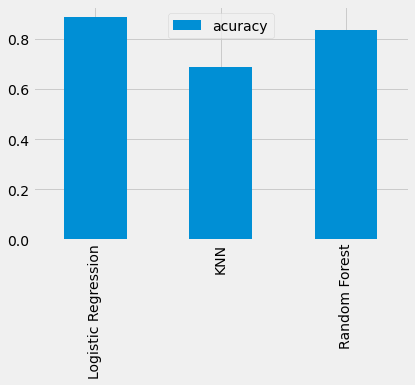

In [29]:
model_compare = pd.DataFrame(model_scores, index=['acuracy'])
model_compare.T.plot.bar();

### ⚙️ Hyperparameter tuning

I'm going to tune Logistic Regression and Random Forest Classifier with RandomizedSearchCV and GridSearchCV

In [30]:
# Create a dict of parameter options for Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                'penalty': ['l1','l2', 'none']}

# Create a dict of parameter options for Random Forest classifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2,20, 2),
           'min_samples_leaf': np.arange(1, 20, 1),
           'max_features': ['auto', 'sqrt', 'log2']}

**Random Forest Classifier**

In [31]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           n_jobs=-1)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   45.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [32]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 16,
 'min_samples_leaf': 15,
 'max_features': 'log2',
 'max_depth': 3}

In [33]:
rs_rf.score(X_test, y_test)

0.8688524590163934

**Logistic Regression**

In [34]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(solver='liblinear'),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                n_jobs=-1,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'C': ar...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                 

In [35]:
rs_log_reg.best_params_

{'solver': 'newton-cg', 'penalty': 'none', 'C': 0.004832930238571752}

In [36]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

In [37]:
# Try LogisticRegression with GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(solver='liblinear'),
                          param_grid=log_reg_grid,
                          cv=5,
                          n_jobs=-1,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    8.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.636...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [38]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [39]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### ☝️ Evaluating model with ☝️

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [40]:
# Make prediction with tuned LogisticRegression model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [41]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

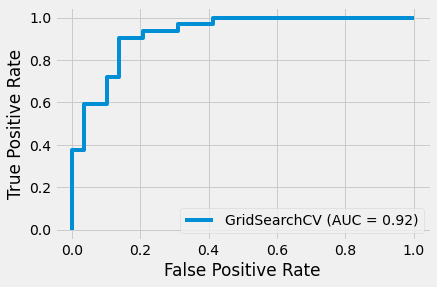

In [42]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [43]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


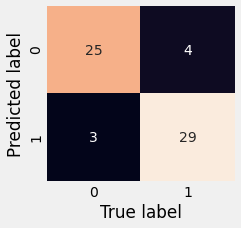

In [44]:
# # Plot confustion matrix
# def plot_conf_mt(y_test, y_preds):
#     """Function plot confusion matrix usiing Seaborn heatmap
    
#     Ags:
#         y_test (series): test labels
#         y_preds (array): predicted labels
#     """
#     fig, ax = plt.subplots(figsize=(3, 3))
#     ax = sns.heatmap(confusion_matrix(y_test, y_preds),
#                      annot=True,
#                      cbar=False)
    
#     plt.xlabel('True label')
#     plt.ylabel('Predicted label')
    
# plot_conf_mt(y_test, y_preds)

In [45]:
# print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metric using cross-validation

In [46]:
# Create a new LogisticRegression with best parameter
clf = LogisticRegression(C= 0.23357214690901212,
                         penalty='l2',
                         solver='liblinear')

In [47]:
# Cross-validate accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')

cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [48]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [49]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,scoring='precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [50]:
# Cross-validate recall
cv_recall = cross_val_score(clf,
                               X,
                               y,
                               cv=5,scoring='recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [51]:
# Cross-validate f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,scoring='f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

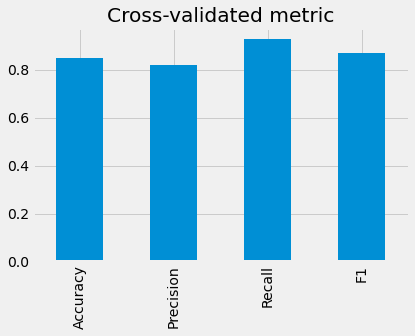

In [52]:
# Visualize cross-validated metric
cv_metric = pd.DataFrame({'Accuracy':cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1':cv_f1},
                         index=[0])

cv_metric.T.plot.bar(title='Cross-validated metric', legend=False);

### Find important feature 

In [53]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [55]:
feature_dict = dict(zip(heart_disease_data.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

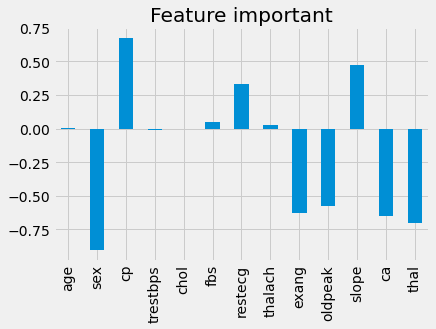

In [56]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature important', legend=False);

## Try with XGBoost

In [57]:
# Import XGBoost Classifier
from xgboost import XGBClassifier

In [58]:
# xg_model = XGBClassifier(silent=False)
# xg_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=False, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [59]:
# xg_model.score(X_test, y_test)

0.819672131147541

### Tuning XGBoost hyperparameter

In [60]:
# np.random.seed(42)

# # Create a hyperparameter grid
# xg_grid = {'scale_pos_weight': [1],
#            'silent': [False],
#            'learning_rate': [0.001, 0.1, 0.3],
#            'colsample_bytree': [0.4, 0.6, 0.8],
#            'subsample': [0.6, 0.8],
#            'objective': ['binary:logistic'],
#            'n_estimators': np.arange(10, 1000, 50),
#            'reg_alpha': [0.3],
#            'max_depth': [4, 6, 10, 15, 20],
#            'gamma': [0, 2, 4, 6, 8, 10]}

# # Setup
# rs_xg = RandomizedSearchCV(xg_model,
#                          param_distributions=xg_grid,
#                          cv=5,
#                          n_iter=1000,
#                          verbose=True)

# rs_xg.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 11.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n...
                                        'learning_rate': [0.001, 0.1, 0.3],
                                        'max_depth': [4, 6, 10, 15, 20],
                              

In [61]:
# rs_xg.best_params_

{'subsample': 0.8,
 'silent': False,
 'scale_pos_weight': 1,
 'reg_alpha': 0.3,
 'objective': 'binary:logistic',
 'n_estimators': 310,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 8,
 'colsample_bytree': 0.8}

In [62]:
# rs_xg.score(X_test, y_test)

0.8524590163934426

** ☹️ Hmm, it doesn't meet my required, so i think i will search and try tuning by hand ... **

In [63]:

# tbh_xg = XGBClassifier(silent=False,
#                        scale_pos_weight=1,
#                        learning_rate=0.01,
#                        colsample_bytree=0.8,
#                        subsample = 0.8,
#                        objective='binary:logistic',
#                        n_estimators=5000,
#                        reg_alpha = 0.005,
#                        max_depth=4,
#                        gamma=0,
#                        min_child_weight=6)

# tbh_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.005,
              reg_lambda=1, scale_pos_weight=1, silent=False, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [64]:
# tbh_xg.score(X_test, y_test)

0.8688524590163934

In [65]:
# y_preds = tbh_xg.predict(X_test)

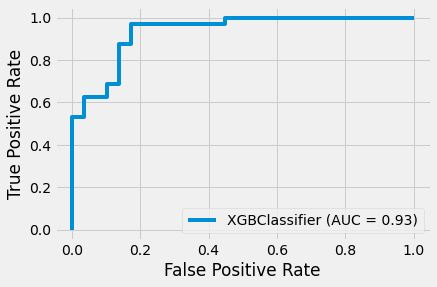

In [66]:
# plot_roc_curve(tbh_xg, X_test, y_test);

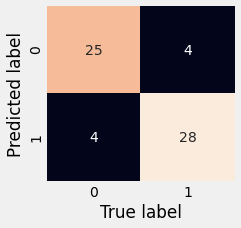

In [67]:
# plot_conf_mt(y_test, y_preds)

In [68]:
# print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

